# STAN47 Lab 4: Convolutional Neural Networks (CNN)
* Instructors: [Małgorzata Bogdan](https://portal.research.lu.se/sv/persons/malgorzata-bogdan), [Hanqing Wu](https://portal.research.lu.se/en/persons/hanqing-wu)

## Analysis of the Fashion-MNIST data using CNN

In this lab, we will investigate convolutional neural networks and their characteristics in image analysis. To do that, we will still use the dataset of clothing, **Fashion-MNIST**. 

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  ## To turn off debugging information 

import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


We import the dataset.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
 
# rescale image
x_train = x_train / 255.0
x_test = x_test / 255.0

The following is a simple neural network with a convolutional layer. After the first convolutional layer, the original image will be "decomposed" into 16 (number of filters) new images. For a more complex model, techniques such as adding more convolutional layers, using different types of pooling (like average pooling), implementing batch normalization, or even utilizing more advanced architectures like ResNet or Inception can be considered. 

In [4]:
FILTERS = 16
KERNEL_SIZE = (3,3)
INPUT_SHAPE = (28, 28, 1)
PADDING = "same"
ACTIVATION = "relu"
DROPOUT = 0.2

model_cnn = tf.keras.models.Sequential([
    # Convolutional layer with 16 filters of size 3x3. 
    # Filters, also known as kernels, in CNN are what define the feature detectors. 
    # They are small matrices of weights that we convolve around the input volume to 
    # transform the input data into more useful representations. In this case, we have 
    # 16 filters, each of size 3x3.
    tf.keras.layers.Conv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, padding=PADDING, activation=ACTIVATION),
    
    # Dropout layer randomly sets 20% of the input units to 0 at each update during training, 
    # which helps prevent overfitting.
    tf.keras.layers.Dropout(DROPOUT),
    
    # MaxPooling layer down-samples the input along its spatial dimensions (height and width) 
    # by taking the maximum value over an input window (in this case, the window shape is 2x2).
    tf.keras.layers.MaxPooling2D(),
    
    # Flatten layer collapses the spatial dimensions of the input into the channel dimension.
    tf.keras.layers.Flatten(),
    
    # Dense (fully connected) layer with 228 neurons and ReLU activation function.
    tf.keras.layers.Dense(228, activation=ACTIVATION),
    
    # Output Dense layer with 10 neurons (for 10 classes), 
    # and softmax activation function which makes it suitable for multi-class classification.
    tf.keras.layers.Dense(10, activation="softmax")
])

In [5]:
model_cnn.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 dropout (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 228)               715236    
                                                                 
 dense_1 (Dense)             (None, 10)                2290      
                                                        

The following chunck of code is an equivalent way to define `model_cnn`. While `keras.Sequential` is sufficient for simple, linearly stacked models, `keras.Model` provides the flexibility needed for more complex model architectures. You may read more about `keras.Model` [here](https://keras.io/api/models/model/).

In [6]:
inputs = tf.keras.layers.Input(shape=INPUT_SHAPE)
x = tf.keras.layers.Conv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, padding=PADDING, activation=ACTIVATION)(inputs)
x = tf.keras.layers.Dropout(DROPOUT)(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(228, activation=ACTIVATION)(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model_cnn = tf.keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model_cnn.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])

model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 228)               715236    
                                                             

### Task 1

In this task, we train a CNN and later observe the feature maps of the convolutional layers.

First, design a CNN with at least two convolutional layers and a pooling layer. Then, fit the model to the scaled dataset and plot the training loss. Note that you can define a portion of your training dataset to get used as validation via:
```python
validation_split=0.2
```
in `model.fit()` function. Here we set validation_split to $0.2$, which means $20\%$ of the training set will be assigned for validation.

The validation set is not directly used to train the model. Instead, it’s used to evaluate the model’s performance at the end of each epoch (one pass through the entire training dataset). This allows you to monitor the model’s performance on unseen data and helps in detecting issues like overfitting.

Finally, evaluate the model on the test set and report the test accuracy.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


# Define the CNN architecture
model = Sequential([
    Conv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, padding=PADDING, activation=ACTIVATION),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(228, activation='relu'),
    Dense(10, activation='softmax') 
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train, y_train_one_hot, epochs=10, validation_split=0.2, batch_size=32)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

NameError: name 'y_train' is not defined

From the plot it is prety clear that the model has overfitted the data, since the training loss goes down as the validation loss goes up, however the accuracy is very good and the difference in loss for each epoch is not significant.    

---

### Task 2

Look at the `plot_layer` defined below. It presents graphically how the image would be transformed by the given layer (if the output of the layer could be interpreted as images). Use the `plot_layer` function to plot the outs of the first and second convolutional layer, respectively. By looking at the output images obtained from different inputs, please comment on the role of the first convolutional layer. What is the difference between the images from the first vs. second convolutional layer? 

Try the same function on the pooling layer. What is happening to the images?

In [8]:
def plot_layer(x, ind_layer, model, num_col = 8): 
    """
    x : The data point you what to see its feature maps x_train[0].
    ind_layer: The index of the layer in the network model.
    model: The neural network model.
    num_col: The number of subplots in a row.
    """
    # Extract output from each layer
    extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])
    features = extractor(np.expand_dims(x, 0))
    
    # feature maps from the layer
    l0_features = features[ind_layer].numpy()[0]
    num_features = model.layers[ind_layer].output.shape[3]
    num_row = int(np.ceil(num_features / num_col))
    fig, ax = plt.subplots(num_row, num_col, sharex=True, sharey=True, figsize=(num_col*2, num_row*2))
    for i in range(0, num_features):
        row, col = i//num_col, i%num_col
        ax[row][col].imshow(l0_features[..., i],cmap='gray')

    plt.show()

In [9]:
#  Visualize the output of the first convolutional layer

plot_layer(
    x = x_train[10],
    ind_layer = 0,
    model = model
)

NameError: name 'model' is not defined

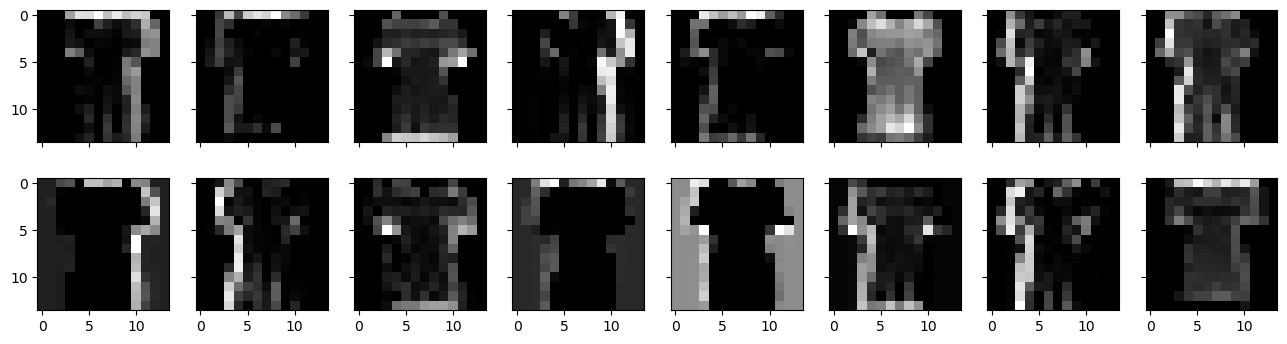

In [33]:
# Visualize the output of the second convolutional layer

plot_layer(
    x = x_train[10],
    ind_layer = 1, 
    model = model
) 

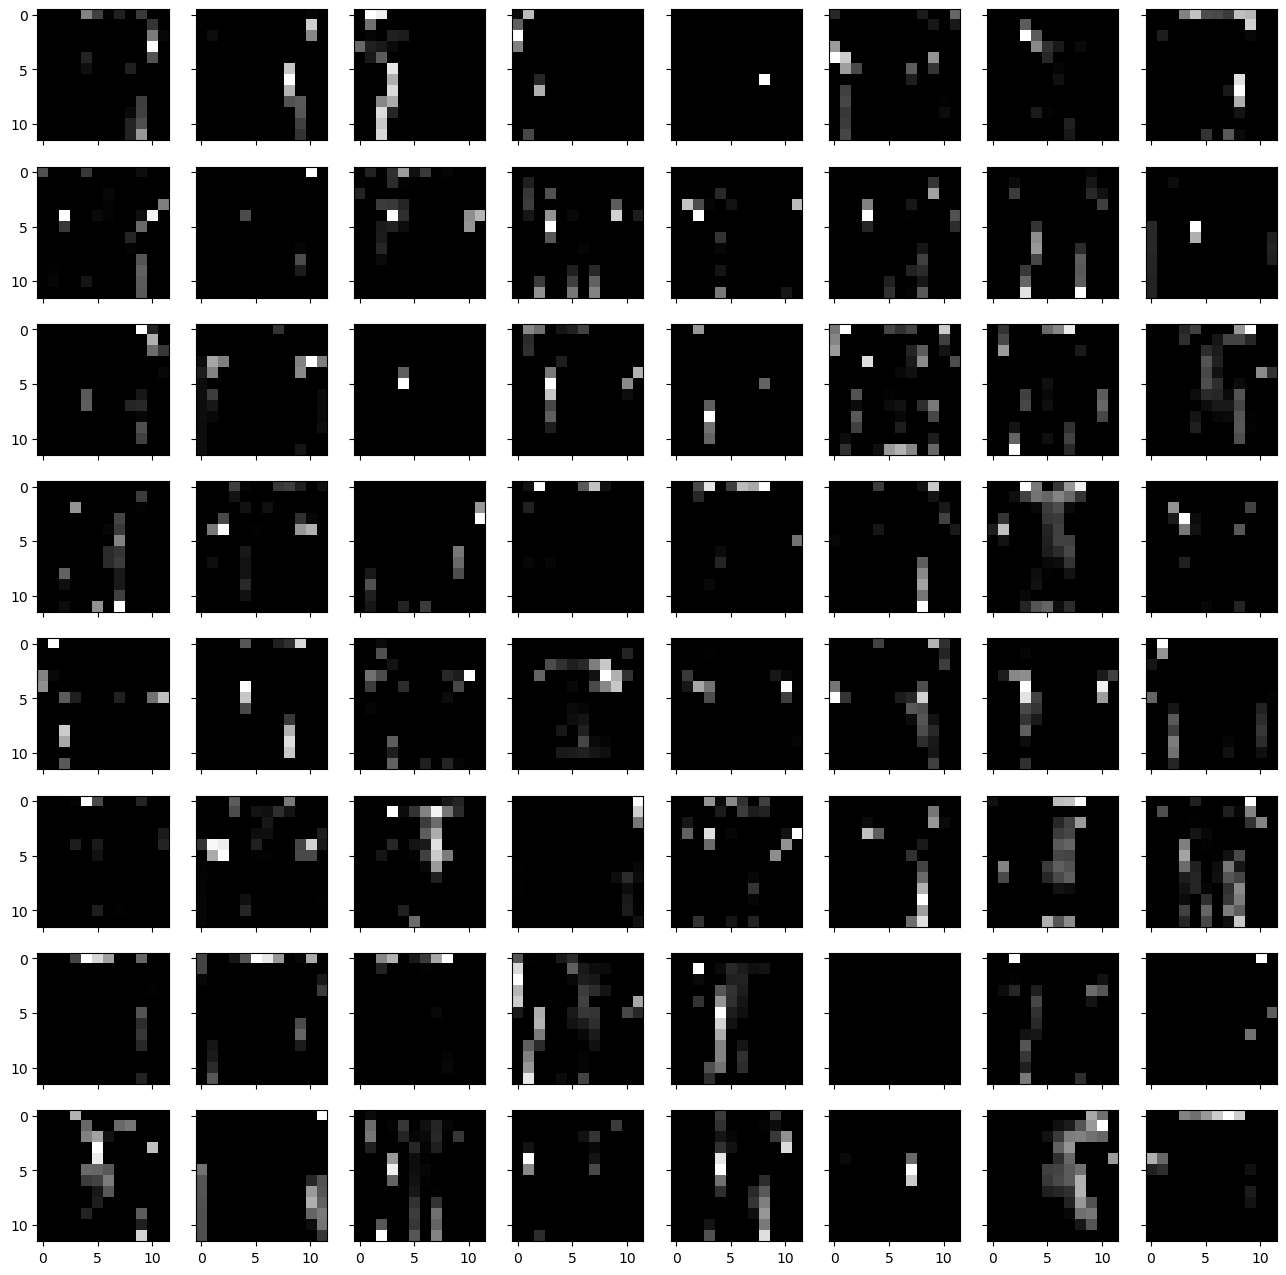

In [34]:
# Visualize the output of the pooling layer

plot_layer(
    x = x_train[10],
    ind_layer = 2,
    model = model
)

In the 3 visualizations of a convolutional neural network's (CNN) layers, one can observe the sequential transformation of an image into feature maps. The first convolutional layer acts as the initial stage of feature detection, highlighting various low-level attributes such as edges and textures. Each filter in this layer responds to different aspects of the visual data, creating a composite of basic patterns.

The second convolutional layer, the feature maps become more abstract. This layer compounds the simple features detected by the first layer into more sophisticated representations. These can signify complex structures like object parts, which are essential for higher-level image understanding but are less visually interpretable.

The pooling layer's output signifies a reduction in the feature maps' spatial dimensions, a process known as downsampling. This layer emphasizes the most prominent features by summarizing the information in smaller, more condensed forms, which helps in reducing computational demands and enhancing the network's robustness to input variations.

---

## Analysis of CIFAR-10 dataset with CNN

We’ve already gained experience in building a Convolutional Neural Network (CNN) for image classification tasks using the Fashion-MNIST dataset, which consists of greyscale images. But what about classifying color images? Let’s explore the CIFAR-10 dataset. This dataset contains color images from 10 different categories, including airplanes, cats, trucks, and more.

In [10]:
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = tf.keras.datasets.cifar10.load_data()

### Task 3

Your task is to analyze the CIFAR-10 dataset using a CNN. Feel free to design the architecture, adjust hyperparameters, and apply regularization techniques. Implement **1-fold cross-validation** with `validation_split=0.2` for performance evaluation.

With a well-designed architecture, carefully tuned hyperparameters, and effective regularization methods like dropout or batch normalization, it is easy to achieve an accuracy over 0.8 on the test set. While this accuracy is not a requirement, we encourage you to challenge yourself to achieve this accuracy and report the efforts you make.

Finally, visualize the training loss and report the test error of your model. 

In [11]:
# Normalize the data
cifar_x_train = cifar_x_train.astype('float32') / 255.0
cifar_x_test = cifar_x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices
cifar_y_train = tf.keras.utils.to_categorical(cifar_y_train, 10)
cifar_y_test = tf.keras.utils.to_categorical(cifar_y_test, 10)

In [12]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

regularizer = regularizers.l2(1e-4)

model_cifar = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', 
                           input_shape=cifar_x_train.shape[1:], activation='relu',
                           kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping and learning rate reduction on plateau
early_stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=1e-5)



In [14]:
model_cifar.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 64)       

Architecture:

• Conv2D Layers: The building blocks of the CNN that apply filters to the input image to create feature maps. They    detect features like edges or textures.

• BatchNormalization: Standardizes the inputs to a layer, helping to speed up training and stabilize learning.

• MaxPooling2D: Reduces the spatial dimensions of the feature maps to lessen the computational load and minimize     overfitting.

• Dropout: Randomly drops out a portion of the neurons in the network during training to prevent overfitting.

• Flatten: Converts the two-dimensional feature maps into a one-dimensional vector suitable for input into the       dense layers.

• Dense Layers: Fully connected neural network layers that perform classification based on the features extracted     by the convolutional layers.

• Regularization: L2 regularization is used to discourage large weights in the network, which can help to prevent     overfitting.

• Compilation: The model uses the Adam optimizer for adjusting weights and the categorical crossentropy loss         function for a multi-class classification problem.

Callbacks:

• EarlyStopping: Monitors performance and halts training early if no improvement is seen in validation loss,         restoring the best model weights found.

• ReduceLROnPlateau: Adjusts the learning rate when the validation loss plateaus, aiding in the convergence of the   model during training.

In [64]:
#history_cifar = model_cifar.fit(
#    cifar_x_train, 
#    cifar_y_train, 
#    epochs=100, 
#    batch_size=64,
#    validation_split=0.2,
#    callbacks=[early_stopper, reduce_lr]
#)

Epoch 1/100
625/625 [==============================] - 28s 45ms/step - loss: 1.7515 - accuracy: 0.4064 - val_loss: 1.5644 - val_accuracy: 0.4758 - lr: 0.0010
Epoch 2/100
625/625 [==============================] - 28s 45ms/step - loss: 1.3287 - accuracy: 0.5608 - val_loss: 1.1455 - val_accuracy: 0.6285 - lr: 0.0010
Epoch 3/100
625/625 [==============================] - 28s 45ms/step - loss: 1.1470 - accuracy: 0.6303 - val_loss: 1.1412 - val_accuracy: 0.6535 - lr: 0.0010
Epoch 4/100
625/625 [==============================] - 28s 45ms/step - loss: 1.0443 - accuracy: 0.6695 - val_loss: 0.9969 - val_accuracy: 0.6911 - lr: 0.0010
Epoch 5/100
625/625 [==============================] - 28s 45ms/step - loss: 0.9790 - accuracy: 0.7021 - val_loss: 0.8857 - val_accuracy: 0.7326 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 29s 46ms/step - loss: 0.9286 - accuracy: 0.7250 - val_loss: 0.8746 - val_accuracy: 0.7481 - lr: 0.0010
Epoch 7/100
625/625 [==============================]

Epoch 49/100
625/625 [==============================] - 29s 47ms/step - loss: 0.3350 - accuracy: 0.9463 - val_loss: 0.7569 - val_accuracy: 0.8360 - lr: 1.0000e-05
Epoch 50/100
625/625 [==============================] - 30s 48ms/step - loss: 0.3417 - accuracy: 0.9453 - val_loss: 0.7583 - val_accuracy: 0.8363 - lr: 1.0000e-05
Epoch 51/100
625/625 [==============================] - 29s 46ms/step - loss: 0.3371 - accuracy: 0.9471 - val_loss: 0.7580 - val_accuracy: 0.8361 - lr: 1.0000e-05
Epoch 52/100
625/625 [==============================] - 29s 47ms/step - loss: 0.3347 - accuracy: 0.9472 - val_loss: 0.7572 - val_accuracy: 0.8380 - lr: 1.0000e-05
Epoch 52: early stopping


In [65]:
# Save the entire model as a SavedModel.
model_cifar.save('model_cifar.h5')

/Users/viktorsjoberg/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model_cifar.h5')

loaded_model.

In [69]:
import pickle

# Save the history to a pickle file
with open('model_cifar_history.pkl', 'wb') as f:
    pickle.dump(history_cifar.history, f)

In [70]:
# Load the history from a pickle file
with open('model_cifar_history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)

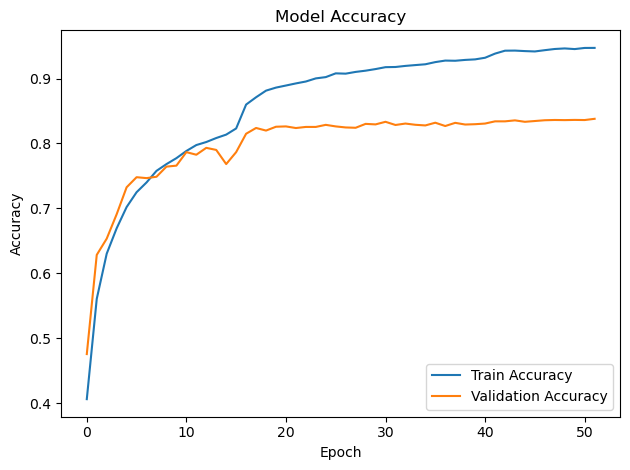

In [102]:
# Plot training & validation accuracy values
plt.plot(history_cifar.history['accuracy'], label='Train Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [68]:
test_loss, test_accuracy = model_cifar.evaluate(cifar_x_test, cifar_y_test, verbose=2)
print(f'Test error: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 - 2s - loss: 0.7704 - accuracy: 0.8271 - 2s/epoch - 8ms/step
Test error: 0.7703883051872253
Test accuracy: 0.8270999789237976


The model goes to 0.8 validation accuracy in aournd 15 epochs and then the learning rate decreases quite fast and has some small imporvments and the early stop stops the training after 52 epochs with a validation accuracy of 0.82

---

Now we have trained the CNN model. Let us have some concrete examples of the model's prediction. The following chunk of code will map the y values to their respective label names.

In [86]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#y_test_labels = [label_names[i[0]] for i in cifar_y_test] 

In [90]:
cifar_x_test = cifar_x_test.astype('float32') / 255.0
cifar_y_test_one_hot = tf.keras.utils.to_categorical(cifar_y_test, 10)

# Label names for CIFAR-10 dataset
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Convert y_test to integers for indexing
y_test_integers = cifar_y_test.flatten()  # Flatten to convert 2D to 1D array


### Task 4

For each of the 10 categories in the CIFAR-10 dataset, select three images from the test set within that category. Use the model you’ve constructed in Task 3 to predict the category of these images. Plot these images with labels indicating both their true category and the category predicted by your model. Finally, provide commentary on your observations and findings after completing both task 3 and task 4.

1/1 [==============================] - 0s 15ms/step


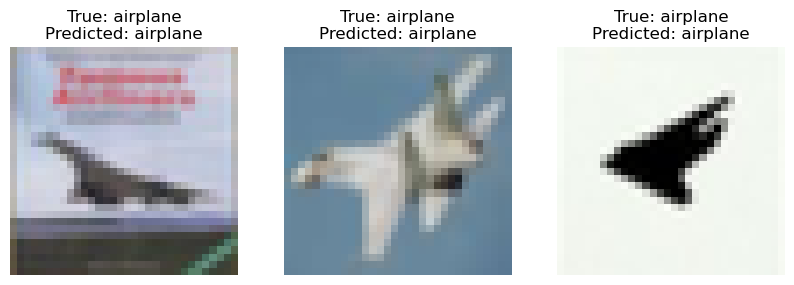

1/1 [==============================] - 0s 10ms/step


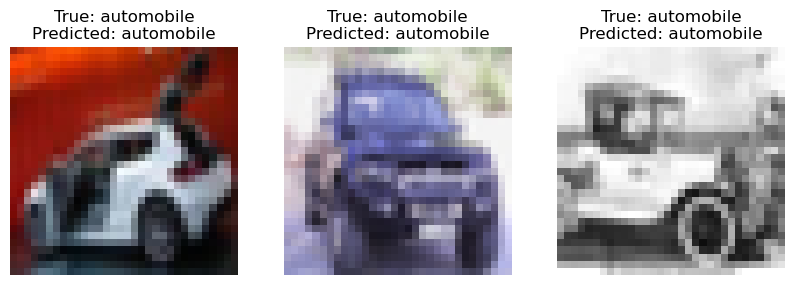

1/1 [==============================] - 0s 9ms/step


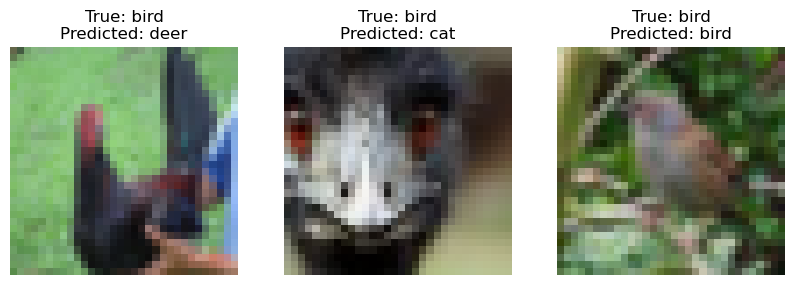

1/1 [==============================] - 0s 10ms/step


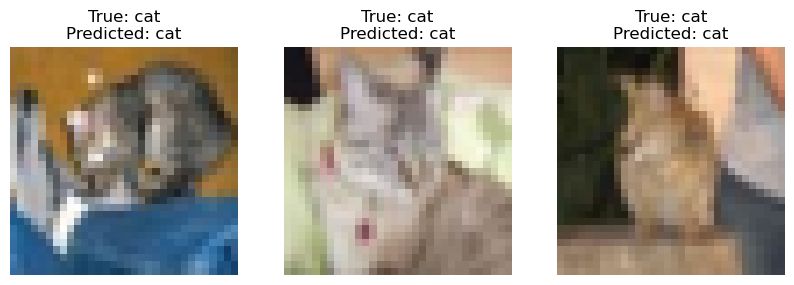

1/1 [==============================] - 0s 11ms/step


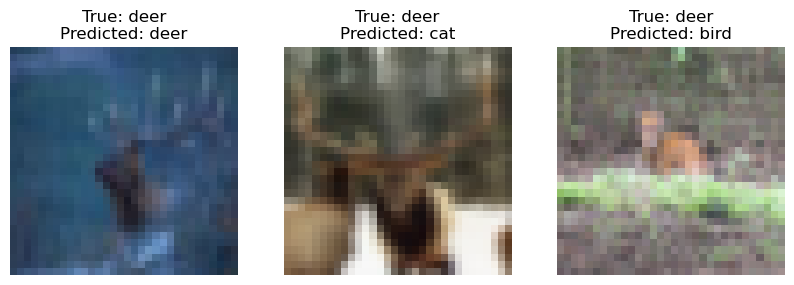

1/1 [==============================] - 0s 10ms/step


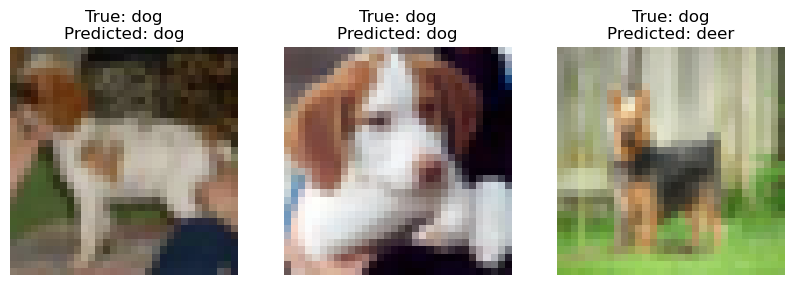

1/1 [==============================] - 0s 10ms/step


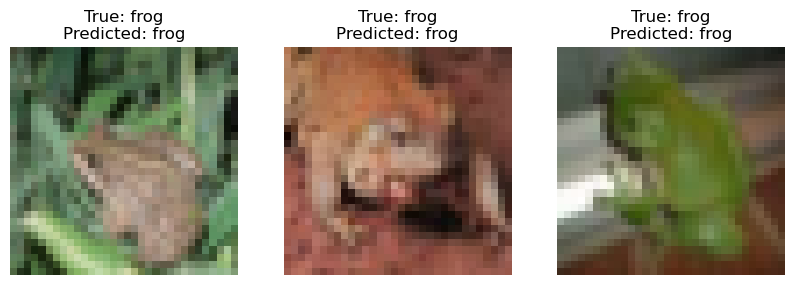

1/1 [==============================] - 0s 10ms/step


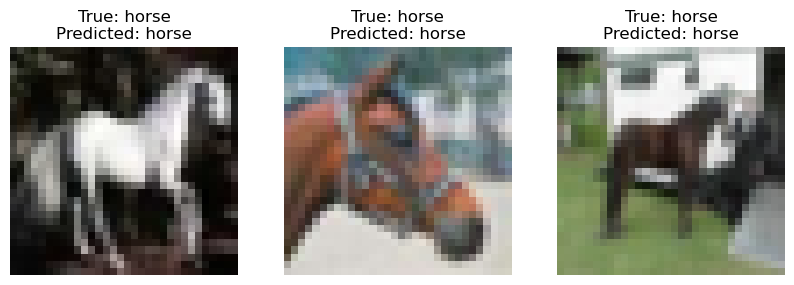

1/1 [==============================] - 0s 10ms/step


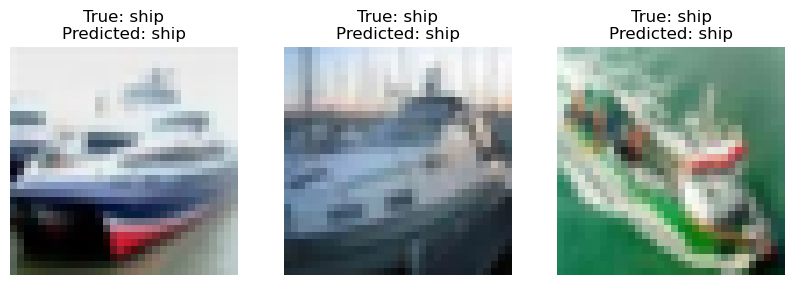

1/1 [==============================] - 0s 9ms/step


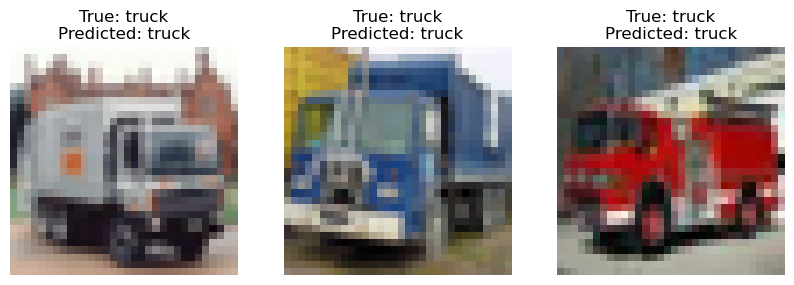

In [93]:
# Select three images from each category in the test set
selected_images = {}
selected_labels = {}
for i in range(10):  # There are 10 categories
    indices = np.where(y_test_integers == i)[0][:3]  # Get the indices of the first 3 images of class i
    selected_images[i] = cifar_x_test[indices]
    selected_labels[i] = cifar_y_test_one_hot[indices]

# Load your trained model

# Predict the category of these images using your model
for i, images in selected_images.items():
    predictions = model_cifar.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    for j, img in enumerate(images):
        axes[j].imshow(img)
        # Display both true and predicted labels
        true_label = label_names[i]
        predicted_label = label_names[predicted_classes[j]]
        axes[j].set_title(f"True: {true_label}\nPredicted: {predicted_label}")
        axes[j].axis('off')
    
    plt.show()



The images that displays a truck, ship, horse, frog, cat, automobile orairplane has all been correctly predicted. from this small sample of 3 imeges per label. 

Bird: 
The model predicts one of the 3 imeges correctly as a bird, the other two are predicted as deer or cat. 

Deer:
The model predicts one of the 3 imeges correctly as a deer, the other two are predicted as bird or cat. 

Dog:
The model predicts 2 of the 3 imeges correctly as a dog, the other one is predicted as deer. 

From this very small sample of predictions it seems that the model often missclasify deers. 



---

### Task 5

We could further investigate how much information are provided by the color of the images. Therefore, we could transform the images into greyscale ones. This means that we need to transform the three-dimensional color data into a single dimension greyscale data. It is not exactly the average of R, G and B. In fact, the formula is 
$$
Y=0.299\times R+0.587\times G+0.114\times B
$$
Design CNN to analyze the grayscale version of CIFAR-10 images following the same procedure in task 3. Based on your result, do you think the information provided by color will significantly affect the performance of the model?

---

In [95]:
def rgb_to_grayscale(images):
    return np.dot(images[...,:3], [0.299, 0.587, 0.114])

# Load CIFAR-10 data
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = tf.keras.datasets.cifar10.load_data()

# Convert to float32
cifar_x_train = cifar_x_train.astype('float32')
cifar_x_test = cifar_x_test.astype('float32')

# Normalize the data
cifar_x_train /= 255.0
cifar_x_test /= 255.0

# Convert images to grayscale
cifar_x_train_gray = rgb_to_grayscale(cifar_x_train).reshape(-1, 32, 32, 1)  # Add an extra dimension for channel
cifar_x_test_gray = rgb_to_grayscale(cifar_x_test).reshape(-1, 32, 32, 1)

# Convert class vectors to binary class matrices
cifar_y_train = tf.keras.utils.to_categorical(cifar_y_train, 10)
cifar_y_test = tf.keras.utils.to_categorical(cifar_y_test, 10)


In [99]:
regularizer = regularizers.l2(1e-4)

model_gray = Sequential([
    Conv2D(32, (3, 3), padding='same', 
           input_shape=(32, 32, 1), activation='relu',  # Adjusted for grayscale
           kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizer),
    MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
    MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(0.25),
    Dense(10, activation='softmax')
])

model_gray.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [100]:
history_gray = model_gray.fit(cifar_x_train_gray, cifar_y_train,
                              batch_size=64,
                              epochs=52,  # Number of epochs used in task 3 (with early stopping)
                              validation_data=(cifar_x_test_gray, cifar_y_test))


Epoch 1/52
782/782 [==============================] - 37s 47ms/step - loss: 1.6222 - accuracy: 0.4593 - val_loss: 1.1933 - val_accuracy: 0.6264
Epoch 2/52
782/782 [==============================] - 35s 45ms/step - loss: 1.1509 - accuracy: 0.6273 - val_loss: 1.2662 - val_accuracy: 0.6027
Epoch 3/52
782/782 [==============================] - 40s 52ms/step - loss: 1.0042 - accuracy: 0.6862 - val_loss: 0.9515 - val_accuracy: 0.7091
Epoch 4/52
782/782 [==============================] - 37s 47ms/step - loss: 0.9259 - accuracy: 0.7181 - val_loss: 0.9174 - val_accuracy: 0.7217
Epoch 5/52
782/782 [==============================] - 37s 48ms/step - loss: 0.8755 - accuracy: 0.7407 - val_loss: 0.9197 - val_accuracy: 0.7359
Epoch 6/52
782/782 [==============================] - 36s 46ms/step - loss: 0.8399 - accuracy: 0.7598 - val_loss: 0.9359 - val_accuracy: 0.7476
Epoch 7/52
782/782 [==============================] - 36s 47ms/step - loss: 0.8107 - accuracy: 0.7781 - val_loss: 1.0680 - val_accuracy:

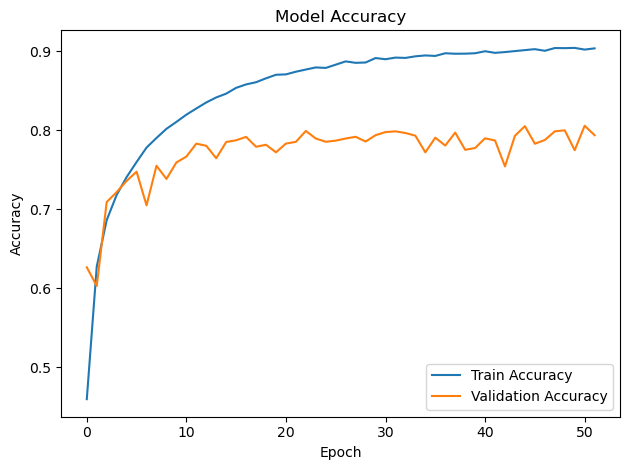

In [101]:
# Plot training & validation accuracy values
plt.plot(history_gray.history['accuracy'], label='Train Accuracy')
plt.plot(history_gray.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

With the additional infromation the model does not improve and with the same articheture it preformce worse. By analyzing the plot we could se a problem that the model has overfitted the data and should have had it´s own early stopping. However the test accraucy is just below 0.8 which indicates that the model quite well predicits the different images. From my own point of view with resdricted machine learning knowladge i dont understand why it is proforming so well. With the "new" data i thought the model would preforme much worse. By analyzing the color from an equation adding upp the pixels there is an infinate number of diffrent ways you coudl get the same input evan do the colors are different. For example 0.299×𝑅(5)+0.587×𝐺(0)+0.114×𝐵(10) is equal to 2,63 and 0.299×𝑅(0)+0.587×𝐺(0)+0.114×𝐵(23.11) is also 2,63 but a totaly differnt color. However the loss is a bit worse with color then without.  